# Quick Tour

In [ ]:
from gvdot import Dot, Markup, Port, Nonce

# Example images are saved to images/ if it exists.
import os; save_images = os.path.isdir("images")

## Basic Construction

Class `Dot` is a DOT language builder.  Method `graph()` establishes or amends
graph attributes.  `node()` and `edge()` define and amend nodes and edges.
Method `subgraph()` defines or amends subgraphs, returning an instance of
`Block`, the base class of `Dot`.  Most builder methods are actually `Block`
methods.

digraph {

    rankdir=LR

    a [label="Node A" shape=box]
    b [label="Node B" penwidth=1.75]

    a -> b [style=dashed color=blue]
    b -> c [label=" B/C " labelfloat=true]

    subgraph cluster_1 {
        style=rounded
        color=orange
        c [style=filled color=orange]
        c -> d
    }

    label="Basic Construction"
}

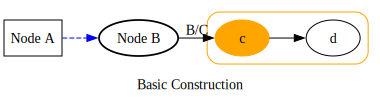

In [2]:
dot = Dot(directed=True)
dot.graph(label="Basic Construction", rankdir="LR")
dot.node("a", label="Node A", shape="box")
dot.node("b", label="Node B")
dot.edge("a", "b", style="dashed", color="blue")
dot.edge("b", "c", label=" B/C ")
block = dot.subgraph("cluster_1")
block.graph(style="rounded", color="orange")
block.node("c", style="filled", color="orange")
block.edge("c","d")
dot.node("b", penwidth=1.75)        # Amend node b
dot.edge("b", "c", labelfloat=True) # Amend b -> c
dot.show_source()
dot.show()

## Rendering

`str(dot)` returns a Dot object's DOT language representation.  `Dot` invokes
Graphviz programs with that representation as input, rendering to files
(`save()`), image bytes (`to_rendered()`), or SVG strings (`to_svg()`).  In
notebooks, `show()` and `show_source()` display rendered SVG and DOT language.

digraph {

    rankdir=LR

    a [label="Node A" shape=box]
    b [label="Node B" penwidth=1.75]

    a -> b [style=dashed color=blue]
    b -> c [label=" B/C " labelfloat=true]

    subgraph cluster_1 {
        style=rounded
        color=orange
        c [style=filled color=orange]
        c -> d
    }

    label="Basic Construction"
}



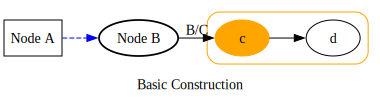

digraph {

    rankdir=LR

    a [label="Node A" shape=box]
    b [label="Node B" penwidth=1.75]

    a -> b [style=dashed color=blue]
    b -> c [label=" B/C " labelfloat=true]

    subgraph cluster_1 {
        style=rounded
        color=orange
        c [style=filled color=orange]
        c -> d
    }

    label="Basic Construction"
}

In [ ]:
if save_images:
    dot.save("images/basic.png")     # Write to file
data = dot.to_rendered(format="jpg") # Get image bytes
svg = dot.to_svg()                   # Get SVG
print(dot)                           # Print DOT language

assert type(data) is bytes
assert type(svg) is str

dot.show()        # Displays rendered SVG
dot.show_source() # Displays DOT language

## Default Attributes

Methods `graph_default()`, `node_default()`, and `edge_default()` establish or
amend default attributes for graphs, nodes, and edges.

graph {

    graph [labelloc=t rankdir=LR bgcolor=antiquewhite]
    node [shape=circle fontsize=10 margin=0]
    edge [fontsize=8 fontcolor=green]

    1 [label="First"]
    2 [label="Second"]
    3 [label="Third"]
    distraction [shape=diamond]

    1 -- 2 [label="steady"]
    2 -- 3 [label="progress"]
    1 -- distraction

    label="Choices"
}

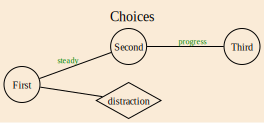

In [4]:
dot = Dot()
dot.graph_default(labelloc="t", rankdir="LR", bgcolor="antiquewhite")
dot.node_default(shape="circle", fontsize=10, margin=0)
dot.edge_default(fontsize=8, fontcolor="green")
dot.graph(label="Choices")
dot.node(1, label="First")
dot.node(2, label="Second")
dot.node(3, label="Third")
dot.node("distraction", shape="diamond")
dot.edge(1, 2, label="steady")
dot.edge(2, 3, label="progress")
dot.edge(1, "distraction")
dot.show_source()
dot.show()


## Roles

A role is a named collection of attribute values.  Methods `graph_role()`,
`node_role()`, and `edge_role()` define or amend roles.  Assigning a role name
to an element's `role` attribute causes that element to inherit the role's
attribute values.

digraph {

    node [style=filled width=0 height=0 fontsize=10 fontname=monospace]

    rankdir=LR

    "model.h" [shape=box fillcolor=orange]
    "main.cpp" [shape=box fillcolor=cyan2]
    server [shape=hexagon fillcolor=green margin=0.02]

    "model.h" -> "main.cpp" [color=orange penwidth=2]
    "interactor.h" -> "main.cpp" [color=orange penwidth=2]
    "main.cpp" -> server [color=green penwidth=2]
    "interactor.cpp" -> server [color=green penwidth=2]

    subgraph {
        cluster=true
        bgcolor=gray80
        penwidth=0
        "interactor.h" [shape=box fillcolor=orange]
        "interactor.cpp" [shape=box fillcolor=cyan2]
        "interactor.h" -> "interactor.cpp" [color=orange penwidth=2]
    }
}

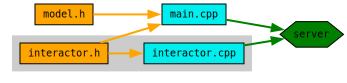

In [5]:
dot = Dot(directed=True).graph(rankdir="LR")
dot.graph_role("library", cluster=True, bgcolor="gray80", penwidth=0)
dot.node_role("source", shape="box", fillcolor="cyan2")
dot.node_role("header", shape="box", fillcolor="orange")
dot.node_role("executable", shape="hexagon", fillcolor="green", margin=0.02)
dot.edge_role("include", color="orange", penwidth=2)
dot.edge_role("link", color="green", penwidth=2)
dot.node_default(style="filled", width=0, height=0,
                 fontsize=10, fontname="monospace")
dot.node("model.h", role="header")
block = dot.subgraph().graph(role="library")
block.node("interactor.h", role="header")
block.node("interactor.cpp", role="source")
block.edge("interactor.h", "interactor.cpp", role="include")
dot.node("main.cpp", role="source")
dot.node("server", role="executable")
dot.edge("model.h", "main.cpp", role="include")
dot.edge("interactor.h", "main.cpp", role="include")
dot.edge("main.cpp", "server", role="link")
dot.edge("interactor.cpp", "server", role="link")

dot.show_source()
dot.show()

## Themes

A theme is a normal `Dot` object from which other Dot objects inherit graph
attributes, default attributes, and roles.  Method `use_theme()` establishes
the inheritance relationship.

digraph {

    graph [penwidth=1.25]
    node [penwidth=1.25 shape=box width=0 height=0 style=filled]
    edge [penwidth=1.25 arrowsize=0.75]

    rankdir=LR

    Fred [margin=0.05 fillcolor=khaki]
    Wilma [margin=0.05 fillcolor=khaki]
    Betty [margin=0.05 fillcolor=khaki]
    Barney [margin=0.05 fillcolor=khaki]
    nil [label="NIL" fontname="sans-serif" fontsize=8 style=filled margin=0.02 width=0]

    Fred -> Wilma [color="#333"]
    Wilma -> Betty [color="#333"]
    Betty -> Barney [color="#333"]
    Barney -> nil [style=dashed]
}

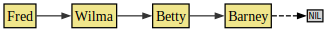

In [6]:
list_theme = Dot()
list_theme.all_default(penwidth=1.25)
list_theme.node_default(shape="box", width=0, height=0, style="filled")
list_theme.edge_default(arrowsize=0.75)
list_theme.node_role("element", margin=0.05, fillcolor="khaki")
list_theme.node_role("nil", label="NIL", fontname="sans-serif", fontsize=8,
                     style="filled", margin=0.02, width=0)
list_theme.edge_role("link", color="#333")
list_theme.edge_role("nil", style="dashed")
list_theme.graph(rankdir="LR")

dot = Dot(directed=True)
dot.use_theme(list_theme)
dot.node("Fred", role="element")
dot.node("Wilma", role="element")
dot.node("Betty", role="element")
dot.node("Barney", role="element")
dot.edge("Fred", "Wilma", role="link")
dot.edge("Wilma", "Betty", role="link")
dot.edge("Betty", "Barney", role="link")
dot.edge("Barney", "nil", role="nil")
dot.node("nil", role="nil")

dot.show_source()
dot.show()

## Method Chaining

Most methods return `self`, enabling chained method calls.

graph {
    node [width=0 height=0]
    rankdir=LR
    a [shape=circle]
    b [shape=diamond]
    a -- b
}

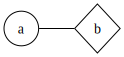

In [7]:
dot = Dot().graph(rankdir="LR").node_default(width=0, height=0)
dot.node("a", shape="circle").node("b",shape="diamond")
dot.edge("a","b")
dot.show_source()
dot.show()

## Nonces

A `Nonce` is a placeholder for a unique identifier generated by `Dot`. Those
generated identifiers will not conflict with any others, either generated or
explicitly provided.

digraph {

    node [shape=plain]
    edge [arrowhead=none]

    anchor_1 [label="" width=0.1 height=0.1 style=filled shape=square]
    anchor_2 [label="" width=0.1 height=0.1 style=filled shape=square]

    anchor_1 -> A
    A -> anchor_2
    anchor_1 -> B
    B -> anchor_2
    anchor_1 -> C
    C -> anchor_2
}

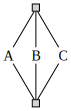

In [8]:

theme = Dot()
theme.node_default(shape="plain")
theme.edge_default(arrowhead="none")
theme.node_role("anchor", label="", width=.10, height=.10,
                style="filled", shape="square")

dot = Dot(directed=True).use_theme(theme)
source = Nonce("anchor")
sink = Nonce("anchor")
dot.node(source, role="anchor")
dot.node(sink, role="anchor")
dot.edge(source,"A").edge("A",sink)
dot.edge(source,"B").edge("B",sink)
dot.edge(source,"C").edge("C",sink)

dot.show_source()
dot.show()

## Markup

Applications use `Markup` to delineate Graphviz HTML strings.

graph {
    rankdir=LR
    1 [label=<x<sub>1</sub>>]
    2 [label=<x<sub>2</sub>>]
    1 -- 2
    label=<<b>Graphviz HTML Strings</b><br/><font point-size="10">are supported</font>>
}

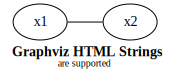

In [9]:
dot = Dot()
dot.graph(rankdir="LR", label=Markup(
    '<b>Graphviz HTML Strings</b><br/>'
    '<font point-size="10">'
    'are supported</font>'))
dot.node(1,label=Markup("x<sub>1</sub>"))
dot.node(2,label=Markup("x<sub>2</sub>"))
dot.edge(1,2)

dot.show_source()
dot.show()

## Ports

An edge endpoint can be a `Port`.

digraph {

    node [shape=record]

    rankdir=LR

    node1 [label="First|<link>next"]
    node2 [label="Second|<link>next"]
    node3 [label="Third|<link>next"]

    subgraph {
        node1:link:s -> node2:w
        node2:link -> node3:s
        node3:link -> node1:ne
    }
}

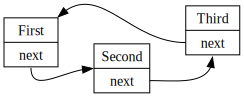

In [10]:
dot = Dot(directed=True)
dot.graph(rankdir="LR")
dot.node_default(shape="record")
dot.node("node1", label="First|<link>next")
dot.node("node2", label="Second|<link>next")
dot.node("node3", label="Third|<link>next")
sub = dot.subgraph()
sub.edge(Port("node1","link", "s"), Port("node2", cp="w"))
sub.edge(Port("node2","link"), Port("node3", cp="s"))
sub.edge(Port("node3","link"), Port("node1", cp="ne"))

dot.show_source()
dot.show()

## Multigraphs

`Dot` constructor argument `multigraph=True` enables multiple edges between
endpoints.  Discriminants allow those edges to be amended.

graph {
    rankdir=LR
    a -- b [label="One"]
    a -- b [label="Two" color=red]
    a -- b [label="Three" style=dashed color=blue penwidth=2.5]
}

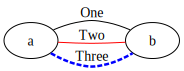

In [11]:
dot = Dot(multigraph=True).graph(rankdir="LR")
dot.edge("a", "b", label="One")
dot.edge("a", "b", label="Two", color="red")
dot.edge("a", "b", "x", label="Three", style="dashed")
dot.edge("a", "b", "x", color="blue", penwidth=2.5) # Amend third edge
dot.show_source()
dot.show()

## Keep in Mind

While several `Dot` methods correspond to DOT language statements, gvdot is not
a DOT language format printer, streaming out DOT language statements with every
call.

Instead, applications build Graphviz diagrams structurally starting with a
`Dot` object.  When finished, they save or render a DOT language representation
of that object.  Method call order is for the most part irrelevant, and
amendments to already defined elements do not create additional DOT language
statements; they change the one statement ultimately emitted.

Similarly, `Role`, `Theme`, and `Nonce` objects are not resolved until a DOT
language representation is required, and those resolutions are ephemeral ---
further changes to the Dot object, roles, or themes can lead to different
resolutions if a DOT language representation is required again.

